<a href="https://colab.research.google.com/github/vishva2410/sentiment_anlysis-with_help_of_AI-/blob/main/Sentiment_Analysis_of_Movie_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,confusion_matrix, roc_curve, auc
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
from nltk.corpus import movie_reviews
import random

# Load dataset
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Shuffle data
random.shuffle(documents)

# Convert to DataFrame
reviews = [" ".join(words) for words, category in documents]
labels = [category for words, category in documents]

df = pd.DataFrame({"review": reviews, "sentiment": labels})


In [24]:
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)
    return text

df["cleaned_review"] = df["review"].apply(clean_text)


In [23]:
vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(df["cleaned_review"])


y = df["sentiment"].apply(lambda x: 1 if x == "pos" else 0)


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=32)

y_train = y_train.values
y_test = y_test.values

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy------->", accuracy_score(y_test, y_pred)*100,"%")
print(classification_report(y_test, y_pred))


Accuracy-------> 83.5 %
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        95
           1       0.89      0.78      0.83       105

    accuracy                           0.83       200
   macro avg       0.84      0.84      0.83       200
weighted avg       0.84      0.83      0.83       200



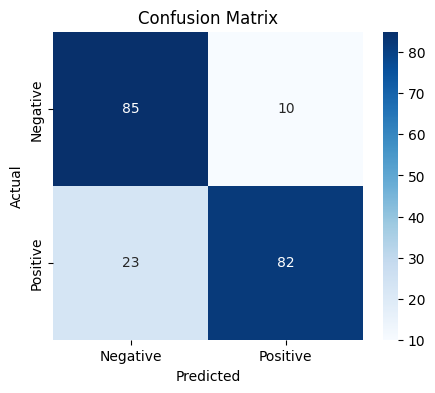

In [51]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

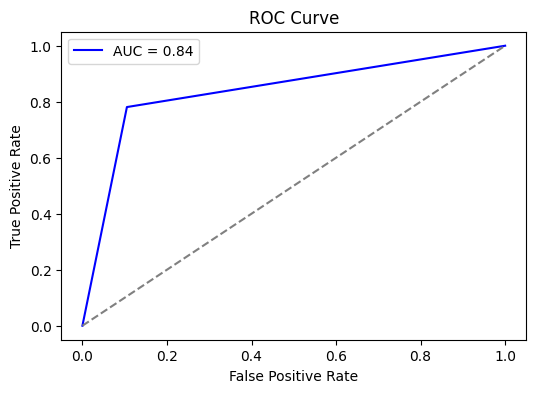

In [53]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

<ipython-input-52-5a80fb50b2e7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette="Set2")


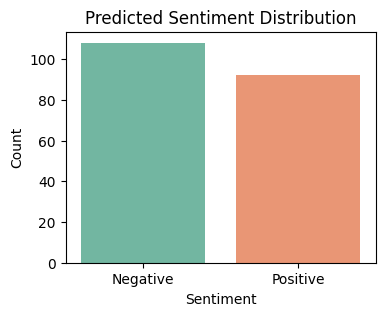

In [52]:
plt.figure(figsize=(4, 3))
sns.countplot(x=y_pred, palette="Set2")
plt.xticks([0, 1], ["Negative", "Positive"])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Predicted Sentiment Distribution")
plt.show()

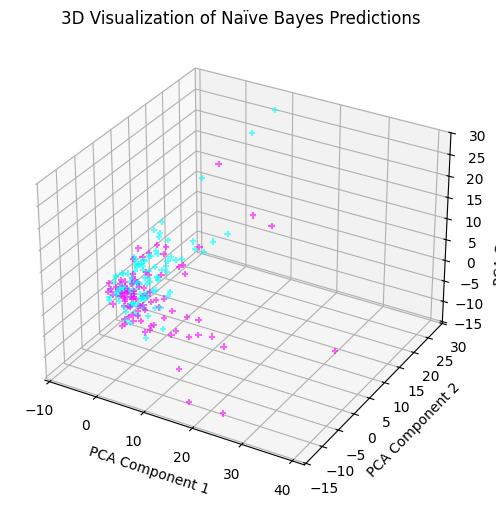

In [61]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_test.toarray())

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 1],
           c=y_pred, cmap='cool', marker='+', alpha=0.6)

ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("3D Visualization of Naïve Bayes Predictions")

plt.show()
